# Report on Ensemble Empirical Mode Decomposition (EEMD) method

In this notebook we apply the EEMD decomposition method to the different synthetic types, namely *basic*, *soil*, *weather* and *soil+weather*.

This technique aims at decomposing an input power signal into trend, seasonality and random components. The trend component is then used for computing the degradation factor (or equivalently the degradation rate). The methodology has the three following steps:
- First, we apply EEMD algorithm. This step takes as input a power signal and outputs a set of oscillatory functions (see below for more details).
- Second, we obtain the spectral representation of the oscillatory functions by Fourier transform (FT). According to their power spectrum, the oscillatory functions are grouped into trend, seasonal and random components. 
- Finally, we estimate the degradation factor (or equivalently the degradation rate) from the trend component.

EEMD is a data-driven, adaptive decomposition method which is a generalization of the Empirical Mode Decomposition (EMD) method. EMD is a technique for decomposing an input signal into a set of oscillatory components named Intrinsic Mode Functions (IMFs). The IMFs must satisfy the following two conditions:
1. the number of extrema and the number of zero-crossings must be the same or differ at most by one
2. at any point, the mean value of the envelope defined by the local maxima and the envelope defined by the local minima is zero.

For a description of the EMD algorithm see [[1]](https://srcole.github.io/2016/01/18/emd/) or [[2]](https://www.hindawi.com/journals/jece/2008/293056/). EEMD uses *M* slightly perturbed copies of the input signal, and applies EMD to each of these copies. Thus, obtaining one set of IMFs for each perturbed signal. The output set of IMFs is obtained by averaging over the ensemble of IMFs, in this way the noise cancels out.


In the notebook named `3.0-mb-decomposition-EEMD.ipynb`, the methodology is described with more detail.

**Open Questions**

- What about precision??
- Why EEMD algorithm fails to decompose most of the *weather* and *weather+soil* time series into IMFs?

**Conclusions/Summary**

- For the degradation rate, we obtain the following root-mean-squared-error (RMSE):
    - **Basic: 0.362 %/year**
    - **Soil: 1.180 %/year**
    - **Weather: 3.020 %/year**
    - **Weather+soil: 2.784 %/year**

**Resources/Bibliograpy**

- [1] [Empirical Mode Decomposition (EMD)](https://srcole.github.io/2016/01/18/emd/)
- [2] [EMD](https://www.hindawi.com/journals/jece/2008/293056/)
- [3] [Ensemble Empirical Mode Decomposition (EEMD)](https://www.worldscientific.com/doi/abs/10.1142/S1793536909000047)
- [4] [EEMD + LSTM](https://link.springer.com/article/10.1007/s11269-019-02345-1)

**Requirements**

- [PyEMD](https://buildmedia.readthedocs.org/media/pdf/pyemd/latest/pyemd.pdf)

In [1]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Replace sample_func_dir by the name of directory in src/ and replace sample_func_file the
# file name in src/sample_func_dir

from src.data.import_data import import_df_from_zip_pkl, import_df_info_from_zip
from src.data.make_dataset import downsample_dataframe
from src.models.eemd_decomposition import eemd_analysis, eemd_analysis_check_extrema, plot_eemd_rd, plot_eemd_rd_extrema
from scipy import fftpack
import matplotlib.pyplot as plt
%matplotlib inline
from PyEMD import EMD, EEMD
from scipy import fftpack
from sklearn.metrics import mean_squared_error
import numpy as np

## Basic

In [2]:
synth_name  = "basic"
path_to_zip = "../data/raw/synthetic_" + synth_name + ".zip"

df          = {}
eIMFs       = {}
res         = {}
nIMFs       = np.zeros(50)
power       = {}
rd_pred     = np.zeros(50)
rd_true     = np.zeros(50)
eta_d       = {} 
eta_d_noisy = {}
trend       = {}

for index in range(0, 50):
    print ("running for %i time series" %index)
    _df, _eemd, _results = eemd_analysis_check_extrema(path_to_zip, index=index, sampling_function=np.mean, 
                                                       seed=True, verbose=False)
    df[index]          = _df
    eIMFs[index]       = _eemd[0]
    res[index]         = _eemd[1]
    nIMFs[index]       = _eemd[2]
    power[index]       = _eemd[3]
    rd_true[index]     = _results[0]
    rd_pred[index]     = _results[1]
    eta_d_noisy[index] =_results[2]
    eta_d[index]       = _results[3]
    trend[index]       = _results[4]

running for 0 time series
running for 1 time series
running for 2 time series
running for 3 time series
running for 4 time series
running for 5 time series
running for 6 time series
running for 7 time series
running for 8 time series
running for 9 time series
running for 10 time series
running for 11 time series
running for 12 time series
running for 13 time series
running for 14 time series
running for 15 time series
running for 16 time series
running for 17 time series
running for 18 time series
running for 19 time series
running for 20 time series
running for 21 time series
running for 22 time series
running for 23 time series
running for 24 time series
running for 25 time series
running for 26 time series
running for 27 time series
running for 28 time series
running for 29 time series
running for 30 time series
running for 31 time series
running for 32 time series
running for 33 time series
running for 34 time series
running for 35 time series
running for 36 time series
running for

/home/julius/Aug20_Epri/src/models/eemd_decomposition.py:164: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Degradation rate RMSE", FONTSIZE=14)


RMSE of the degradation rate is 0.362 percentage/year


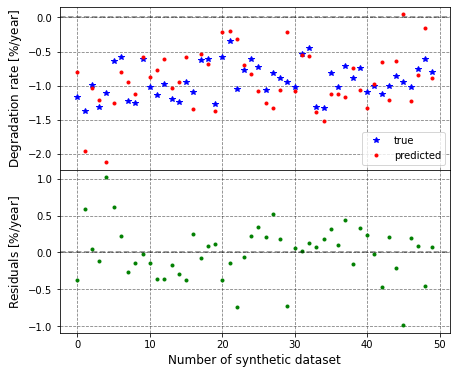

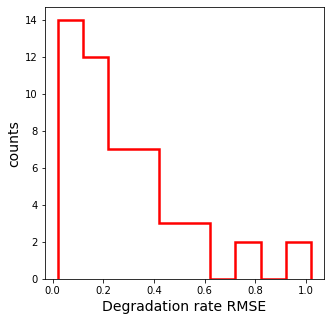

In [3]:
plot_eemd_rd(rd_true, rd_pred)

rmse = mean_squared_error(rd_true*100, rd_pred*100, squared=False)
print ("RMSE of the degradation rate is %.3f percentage/year" %(rmse))

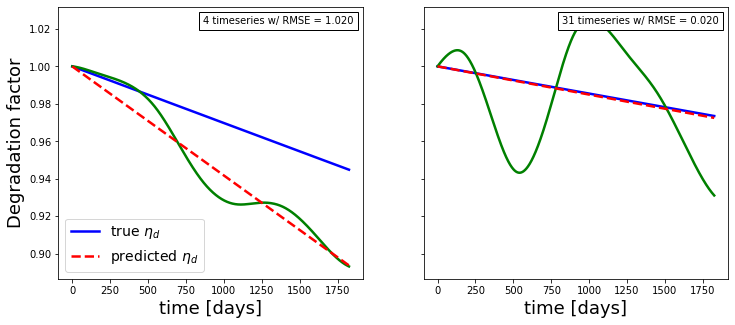

In [4]:
plot_eemd_rd_extrema(df, rd_true, rd_pred, eta_d, eta_d_noisy)

## Soil

In [5]:
synth_name  = "soil"
path_to_zip = "../data/raw/synthetic_" + synth_name + ".zip"

df          = {}
eIMFs       = {}
res         = {}
nIMFs       = np.zeros(50)
power       = {}
rd_pred     = np.zeros(50)
rd_true     = np.zeros(50)
eta_d       = {} 
eta_d_noisy = {}
trend       = {}

for index in range(0, 50):
    print ("running for %i time series" %index)
    #_df, _eemd, _results = eemd_analysis_check_extrema(path_to_zip, index=index, sampling_function=np.mean, 
    #                                                       seed=True, verbose=False)
    _df, _eemd, _results = eemd_analysis(path_to_zip, index=index, sampling_function=np.mean, seed=True, 
                                         max_extrema=3, verbose=False)
    
    df[index]          = _df
    eIMFs[index]       = _eemd[0]
    res[index]         = _eemd[1]
    nIMFs[index]       = _eemd[2]
    power[index]       = _eemd[3]
    rd_true[index]     = _results[0]
    rd_pred[index]     = _results[1]
    eta_d_noisy[index] =_results[2]
    eta_d[index]       = _results[3]
    trend[index]       = _results[4]

running for 0 time series
running for 1 time series
running for 2 time series
running for 3 time series
running for 4 time series
running for 5 time series
running for 6 time series
running for 7 time series
running for 8 time series
running for 9 time series
running for 10 time series
running for 11 time series
running for 12 time series
running for 13 time series
running for 14 time series
running for 15 time series
running for 16 time series
running for 17 time series
running for 18 time series
running for 19 time series
running for 20 time series
running for 21 time series
running for 22 time series
running for 23 time series
running for 24 time series
running for 25 time series
running for 26 time series
running for 27 time series
running for 28 time series
running for 29 time series
running for 30 time series
running for 31 time series
running for 32 time series
running for 33 time series
running for 34 time series
running for 35 time series
running for 36 time series
running for

/home/julius/Aug20_Epri/src/models/eemd_decomposition.py:164: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Degradation rate RMSE", FONTSIZE=14)


RMSE of the degradation rate is 1.302 percentage/year


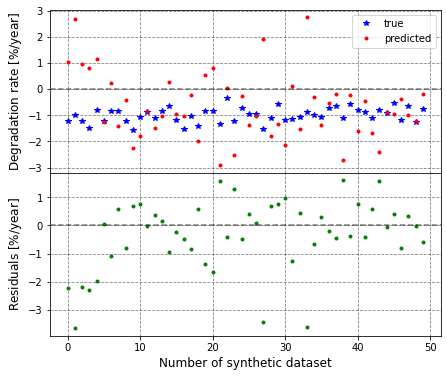

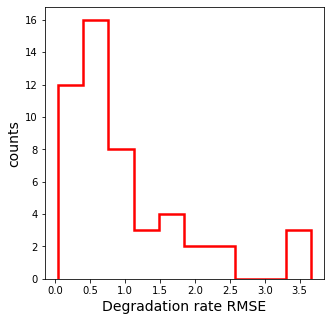

In [6]:
plot_eemd_rd(rd_true, rd_pred)

rmse = mean_squared_error(rd_true*100, rd_pred*100, squared=False)
print ("RMSE of the degradation rate is %.3f percentage/year" %(rmse))

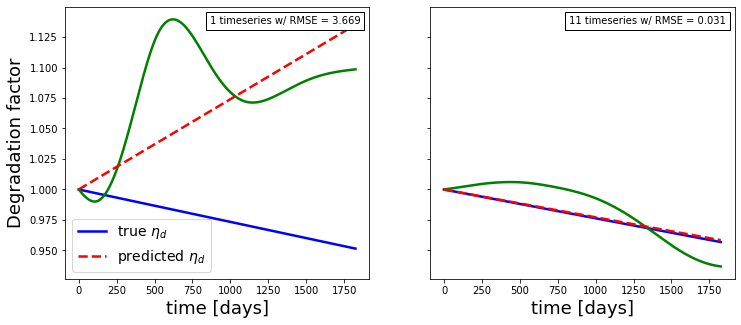

In [7]:
plot_eemd_rd_extrema(df, rd_true, rd_pred, eta_d, eta_d_noisy)

## Weather

In [7]:
synth_name  = "weather"
path_to_zip = "../data/raw/synthetic_" + synth_name + ".zip"

df          = {}
eIMFs       = {}
res         = {}
nIMFs       = np.zeros(50)
power       = {}
rd_pred     = np.zeros(50)
rd_true     = np.zeros(50)
eta_d       = {} 
eta_d_noisy = {}
trend       = {}

for index in range(0, 50):
    print ("running for %i time series" %index)
    #_df, _eemd, _results = eemd_analysis(path_to_zip, index=index, sampling_function=np.mean, seed=True, 
    #                                     max_extrema=2, verbose=False)
    
    _df, _eemd, _results = eemd_analysis_check_extrema(path_to_zip, index=index, sampling_function=np.mean, 
                                                       seed=True, verbose=False)
    df[index]          = _df
    eIMFs[index]       = _eemd[0]
    res[index]         = _eemd[1]
    nIMFs[index]       = _eemd[2]
    power[index]       = _eemd[3]
    rd_true[index]     = _results[0]
    rd_pred[index]     = _results[1]
    eta_d_noisy[index] =_results[2]
    eta_d[index]       = _results[3]
    trend[index]       = _results[4]

running for 0 time series
running for 1 time series
running for 2 time series
running for 3 time series
running for 4 time series
running for 5 time series
running for 6 time series
running for 7 time series
running for 8 time series
running for 9 time series
running for 10 time series
running for 11 time series
running for 12 time series
running for 13 time series
running for 14 time series
running for 15 time series
running for 16 time series
running for 17 time series
running for 18 time series
running for 19 time series
running for 20 time series
running for 21 time series
running for 22 time series
running for 23 time series
running for 24 time series
running for 25 time series
running for 26 time series
running for 27 time series
running for 28 time series
running for 29 time series
running for 30 time series
running for 31 time series
running for 32 time series
running for 33 time series
running for 34 time series
running for 35 time series
running for 36 time series
running for

RMSE of the degradation rate is 3.020 percentage/year


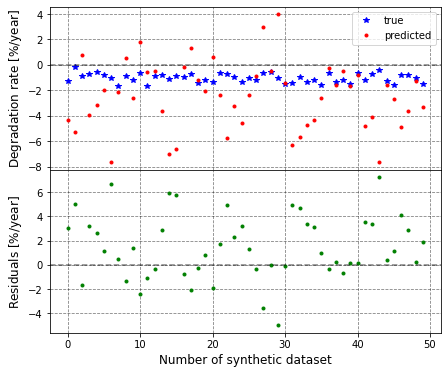

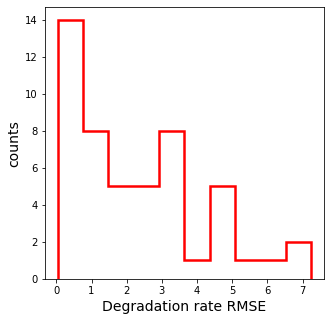

In [8]:
plot_eemd_rd(rd_true, rd_pred)

rmse = mean_squared_error(rd_true*100, rd_pred*100, squared=False)
print ("RMSE of the degradation rate is %.3f percentage/year" %(rmse))

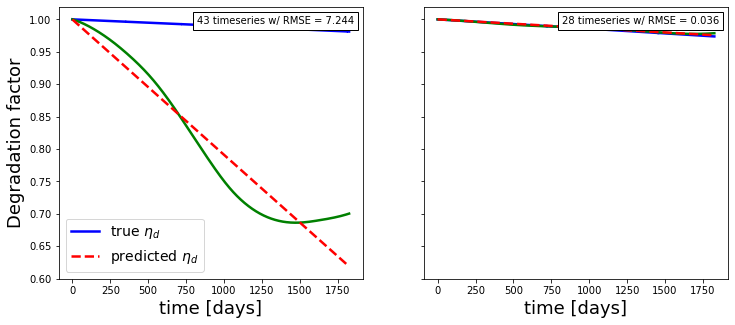

In [4]:
plot_eemd_rd_extrema(df, rd_true, rd_pred, eta_d, eta_d_noisy)

## Soil + Weather

In [11]:
synth_name  = "soil_weather"
path_to_zip = "../data/raw/synthetic_" + synth_name + ".zip"

df          = {}
eIMFs       = {}
res         = {}
nIMFs       = np.zeros(50)
power       = {}
rd_pred     = np.zeros(50)
rd_true     = np.zeros(50)
eta_d       = {} 
eta_d_noisy = {}
trend       = {}

for index in range(0, 50):
    print ("running for %i time series" %index)
    #_df, _eemd, _results = eemd_analysis(path_to_zip, index=index, sampling_function=np.mean, seed=True, 
    #                                     max_extrema=2, verbose=False)
    _df, _eemd, _results = eemd_analysis_check_extrema(path_to_zip, index=index, sampling_function=np.mean, 
                                                       seed=True, verbose=False)
    
    df[index]          = _df
    eIMFs[index]       = _eemd[0]
    res[index]         = _eemd[1]
    nIMFs[index]       = _eemd[2]
    power[index]       = _eemd[3]
    rd_true[index]     = _results[0]
    rd_pred[index]     = _results[1]
    eta_d_noisy[index] =_results[2]
    eta_d[index]       = _results[3]
    trend[index]       = _results[4]

running for 0 time series
running for 1 time series
running for 2 time series
running for 3 time series
running for 4 time series
running for 5 time series
running for 6 time series
running for 7 time series
running for 8 time series
running for 9 time series
running for 10 time series
running for 11 time series
running for 12 time series
running for 13 time series
running for 14 time series
running for 15 time series
running for 16 time series
running for 17 time series
running for 18 time series
running for 19 time series
running for 20 time series
running for 21 time series
running for 22 time series
running for 23 time series
running for 24 time series
running for 25 time series
running for 26 time series
running for 27 time series
running for 28 time series
running for 29 time series
running for 30 time series
running for 31 time series
running for 32 time series
running for 33 time series
running for 34 time series
running for 35 time series
running for 36 time series
running for

RMSE of the degradation rate is 2.784 percentage/year


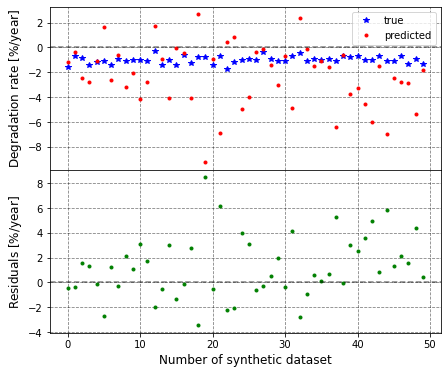

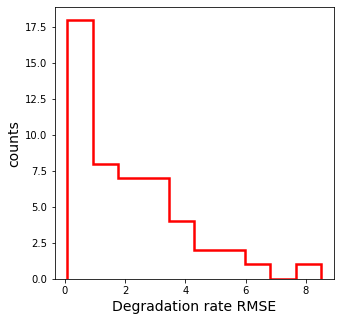

In [12]:
plot_eemd_rd(rd_true, rd_pred)

rmse = mean_squared_error(rd_true*100, rd_pred*100, squared=False)
print ("RMSE of the degradation rate is %.3f percentage/year" %(rmse))

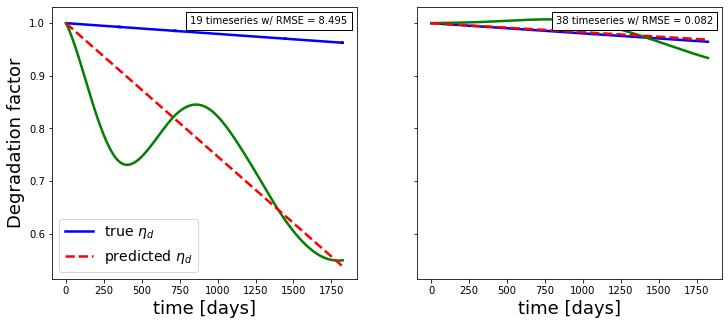

In [13]:
plot_eemd_rd_extrema(df, rd_true, rd_pred, eta_d, eta_d_noisy)